# Bank Customer Churn Prediction

In [17]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## 1. Preparing the Data

In [18]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("saurabhbadole/bank-customer-churn-prediction-dataset")

# print("Path to dataset files:", path)

In [19]:
path = r'C:\Users\ENM\.cache\kagglehub\datasets\saurabhbadole\bank-customer-churn-prediction-dataset\versions\2'
# Loading the data from a kaggle dataset
file = [f for f in os.listdir(path)]

file_path = os.path.join(path, file[0])
print(file)
print(file_path)

data = pd.read_csv(file_path)
data.head()

['Churn_Modelling.csv']
C:\Users\ENM\.cache\kagglehub\datasets\saurabhbadole\bank-customer-churn-prediction-dataset\versions\2\Churn_Modelling.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# checking the size of the
data.shape

(10000, 14)

### Data Cleaning

In [21]:
# checking for null values 
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
# checking for duplicates
data.duplicated().sum()

np.int64(0)

## 2. EXPLORATORY DATA ANALYSIS (EDA)

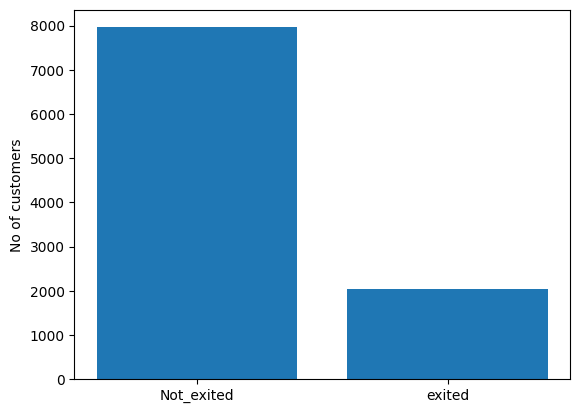

In [23]:
# checking for the distribution of our target variable
data['Exited'].value_counts()

exited = [x for x in data['Exited'].value_counts()]

x_labels = [0, 1]
plt.bar(x_labels, exited)
plt.xticks(x_labels, ['Not_exited', 'exited'])
plt.ylabel('No of customers')
plt.show()

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## EDA summary
- We can see that:
    1. We are dealing with a classification task. Where we are supposed to classify a customer whether they are likely to exit the bank.
    2. We are dealing with an imbalanced dataset containing about <b>8000</b> records of class 0 and about <b>2000</b> records of class 1.
    2. We have 2 categorical independent variables: <i><b>IsActiveMember, HasCrCard</b></i>

## 3. MODEL BUILDING

### A. Decion Tree Model

In [25]:
# importing the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, train_test_split

In [26]:
# Splitting the data into the dependent and independent variables
X = data.drop('Exited', axis=1)
y = data['Exited']

In [27]:
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training the DEscion tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
# Predict and evaluate the model
y_pred = clf.predict(X_test)

accuracy_decision = accuracy_score(y_test, y_pred)
print(f'The accuracy for the Decision tree model is: {accuracy_decision}')

confusion_decision = confusion_matrix(y_test, y_pred)
print(f'\nThe confusion matrix for the Decision tree model is: \n{confusion_decision}')

class_decision = classification_report(y_test, y_pred)
print(f'\nThe Classification report for the Decision tree model is: \n{class_decision}')

The accuracy for the Decision tree model is: 0.8585

The confusion matrix for the Decision tree model is: 
[[1560   47]
 [ 236  157]]

The Classification report for the Decision tree model is: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



### Observation
1. According to the classification report, The model has a 53% accuracy in predicting class 1 (exited) as compared to a 
    92% accuracy in predicting class 0 (Not exited). This shows that the model is baised due to the class imbalance.

### Dealing With Class Imbalance

In [29]:
# Importing the necessary modules
from sklearn.utils import resample

In [30]:
# seperate the minority and the majority classes
exited = data[data['Exited'] == 1] # Minority
not_exited = data[data['Exited'] == 0] # Majority

In [31]:
# using a mix of downsampling the majority and upsampling the minority
class_size = int(round(len(not_exited)/2,0))

# downsample the majority to match the class size
maj_downsampled = resample(
    not_exited,
    replace=False, # Sample without replacement
    n_samples=class_size,
    random_state=69
) 

# upsample the minority to match the class size
min_upsampled = resample(
    exited,
    replace=True, # sample with replacement
    n_samples=class_size,
    random_state=69
)

# combining the two
up_down_sampled = pd.concat([maj_downsampled, min_upsampled])

up_down_sampled['Exited'].value_counts()

Exited
0    3982
1    3982
Name: count, dtype: int64

### Training the Descion Tree Model on the re-sampled Data

In [57]:
# importing the scaler 
from sklearn.preprocessing import StandardScaler
# Splitting the data into the dependent and independent variables
X_resampled = up_down_sampled.drop('Exited', axis=1)
y_resampled = up_down_sampled['Exited']

X_encoded = pd.get_dummies(X_resampled, drop_first=True)

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_resampled, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the DEscion tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test_scaled)

accuracy_decision = accuracy_score(y_test, y_pred)
print(f'The accuracy for the Decision tree model is: {accuracy_decision}')

confusion_decision = confusion_matrix(y_test, y_pred)
print(f'\nThe confusion matrix for the Decision tree model is: \n{confusion_decision}')

class_decision = classification_report(y_test, y_pred)
print(f'\nThe Classification report for the Decision tree model is: \n{class_decision}')

The accuracy for the Decision tree model is: 0.7614563716258631

The confusion matrix for the Decision tree model is: 
[[589 240]
 [140 624]]

The Classification report for the Decision tree model is: 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       829
           1       0.72      0.82      0.77       764

    accuracy                           0.76      1593
   macro avg       0.77      0.76      0.76      1593
weighted avg       0.77      0.76      0.76      1593



### Observation
1. The model accuracy for class 1 has now increased to 77% from 53% meaning the model is now better at making predictions whether the customer is likely to exit the bank.

<b>Next: We will try and train multiple models (Random forest, neural network..etc) and determine the best model</b>

### B. Multiple model Selection

In [36]:
# importing the necessary packages
from  sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [ ]:
# Define the names of the classifiers
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Linear SVM', 'RBF SVM',          
         'Random Forest',  'AdaBoost']

In [ ]:
# Define the classifiers with their respective hyperparameters
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier()
]

In [58]:
# empty lists to store the results
results = [] # to store the evaluation metrics for each model
models = {} # to store the trained models
confusion = {} # to store the confusion matrices for each classifier
class_report = {} # to store the classification reports for each classifier

# iterate over each classifer
for name, clf in zip(names, classifiers):
    print(f'Fitting the {name} model...')
    run_time = %timeit -q -o clf.fit(X_train_scaled, y_train)

    print('...Predicting')
    y_pred = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)

    print('...Scoring')
    # Calculate evaluation metrics
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)
    
    f1        = metrics.f1_score(y_train, y_pred)    
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    # Append results to the list
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


# Convert results to DataFrame for easy visualisation
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')


Fitting the Logistic Regression model...
...Predicting
...Scoring
Fitting the Nearest Neighbors model...
...Predicting
...Scoring
Fitting the Linear SVM model...
...Predicting
...Scoring
Fitting the RBF SVM model...
...Predicting
...Scoring
Fitting the Random Forest model...
...Predicting
...Scoring
Fitting the AdaBoost model...
...Predicting
...Scoring
... All done!


In [64]:
print(class_report['RBF SVM'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00      3218

    accuracy                           1.00      6371
   macro avg       1.00      1.00      1.00      6371
weighted avg       1.00      1.00      1.00      6371



In [59]:
# Visualing the results
results.sort_values(by='F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,1.000000,1.000000,1.000000,1.000000,0.893555,56.028386
Linear SVM,0.864699,0.842841,0.899938,0.870454,0.742857,29.954245
Logistic Regression,0.865013,0.846765,0.894655,0.870051,0.740325,0.600854
Nearest Neighbors,0.840998,0.797410,0.918583,0.853718,0.678487,0.170301
AdaBoost,0.785905,0.808178,0.755438,0.780919,0.741192,6.019267
Random Forest,0.515775,0.510581,0.997203,0.675366,0.649638,0.079623


Text(0.5, 1.0, 'Training Time vs. Classifier')

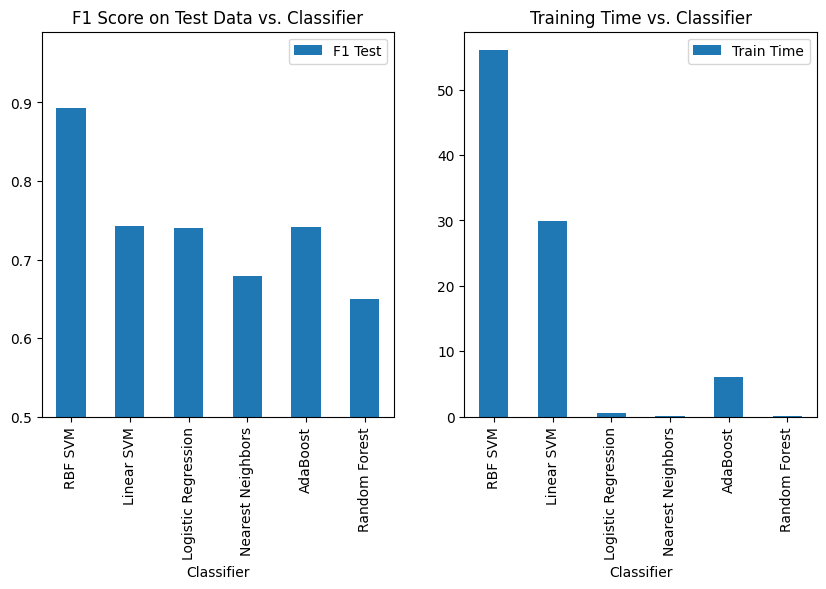

In [60]:
# Plot F1 Score on Test Data vs. Classifier
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], ylim=[0.50,0.99])
ax[0].set_title('F1 Score on Test Data vs. Classifier')
results.plot(y='Train Time', kind='bar', ax=ax[1])
ax[1].set_title('Training Time vs. Classifier')

## 3. Model Validation
Using k-fold cross validation to check if our models produce relaible results. In k-fold validation, a model is trained on k-1 folds and then evaluated on the remaining fold.

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
# Initialize an empty list to store cross-validation results
cv = []

# Iterate over each model in the 'models' dictionary
for name, model in models.items():
    if name != 'Logistic Regression':
        print()  # Print an empty line for better readability
        print(name)  # Print the name of the current model
        # Perform k-fold cross-validation (with k=10) on the current model
        scores = cross_val_score(model, X=X_encoded, y=y_resampled, cv=10)
        # Calculate the mean and standard deviation of the cross-validation scores
        print("Accuracy: {:0.2f} (+/- {:0.4f})".format(scores.mean(), scores.std()))
        # Append the model name, mean cross-validation score, and standard deviation to the 'cv' list
        cv.append([name, scores.mean(), scores.std()])

# Convert the list of cross-validation results to a DataFrame
cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])

# Set the index of the DataFrame to the model names
cv.set_index('Model', inplace=True)


Nearest Neighbors
Accuracy: 0.67 (+/- 0.0086)

Linear SVM
Accuracy: 0.57 (+/- 0.0145)

RBF SVM
Accuracy: 0.91 (+/- 0.0046)

Random Forest
Accuracy: 0.54 (+/- 0.0630)

AdaBoost
Accuracy: 0.77 (+/- 0.0118)
